In [169]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [18]:
with open('/Users/johnmaxbarry/.ssh/spotify.json', 'rb') as read_file:
    credentials = json.load(read_file)
    
CLIENT_ID = credentials['Client ID']
CLIENT_SECRET = credentials['Client Secret']

In [19]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [21]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}



In [74]:
jazz_tracks = []

offset = 0
for r in range(int(1000/50)):
    params = {'q':'genre:jazz', 'type':'track', 'limit':50, 'offset':offset}
    response = requests.get('https://api.spotify.com/v1/search/', params=params, headers=headers)
    jazz_tracks.extend(response.json()['tracks']['items'])
    offset+=50

In [172]:
with open('data/jazz_query_response', 'wb') as write_file:
    pickle.dump(jazz_tracks, write_file)

In [152]:
def get_genre_tracks(genre):
    
    '''
    Params
    _____
    genre: genre to add to the query url
    
    Return
    _____
    list of tracks associated with the given genre
    '''
    
    with open('/Users/johnmaxbarry/.ssh/spotify.json', 'rb') as read_file:
        credentials = json.load(read_file)
    
    CLIENT_ID = credentials['Client ID']
    CLIENT_SECRET = credentials['Client Secret']
    
    AUTH_URL = 'https://accounts.spotify.com/api/token'

    # POST
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
    })

    # convert the response to JSON
    auth_response_data = auth_response.json()

    # save the access token
    access_token = auth_response_data['access_token']

    headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
    }

    tracks = []

    offset = 0
    for r in range(int(1000/50)):
        params = {'q':f'genre:{genre}', 'type':'track', 'limit':50, 'offset':offset}
        response = requests.get('https://api.spotify.com/v1/search/', params=params, headers=headers)
        tracks.extend(response.json()['tracks']['items'])
        offset+=50
    
    track_durations = [track['duration_ms'] for track in tracks]
        
    return track_durations

In [163]:
classical_track_durations = get_genre_tracks('classical')


In [165]:
rap_track_durations = get_genre_tracks('rap')

In [167]:
punk_track_durations = get_genre_tracks('punk')

In [171]:
with open('data/track_length_lists', 'wb') as write_file:
    pickle.dump([classical_track_durations, rap_track_durations, punk_track_durations], write_file)

# Task 1

The jazz_tracks object is a list of dictionaries, each element of which refers to a jazz track returned from a query to the Spotify API.  

First, parse the jazz_tracks list, and create a list of all 1000 track lengths.



In [92]:
artists = [track['artists'][0]['name'] for track in jazz_tracks]


['Michael Bublé',
 'Nat King Cole',
 'Perry Como',
 'Michael Bublé',
 'Grover Washington, Jr.',
 'Nat King Cole',
 'Vince Guaraldi Trio',
 'Louis Armstrong',
 'Judy Garland',
 'Eartha Kitt',
 'Michael Bublé',
 'Ella Fitzgerald',
 'Ella Fitzgerald',
 'Michael Bublé',
 'Tony Bennett',
 'Leslie Odom Jr.',
 'Earth, Wind & Fire',
 'Leslie Odom Jr.',
 'Michael Bublé',
 'Nat King Cole',
 'Michael Bublé',
 'Perry Como',
 'Vince Guaraldi Trio',
 'Tony Bennett',
 'Nat King Cole Trio',
 'Perry Como',
 'Nat King Cole',
 'Etta James',
 'Norah Jones',
 'Peggy Lee',
 'Louis Armstrong',
 'Vince Guaraldi Trio',
 'Kay Starr',
 'Leslie Odom Jr.',
 'Vince Guaraldi Trio',
 'Ella Fitzgerald',
 'Nat King Cole',
 'Michael Bublé',
 'Etta James',
 'Michael Bublé',
 'Vince Guaraldi Trio',
 'Vince Guaraldi Trio',
 'Michael Bublé',
 'Etta James',
 'Michael Bublé',
 'Eartha Kitt',
 'Earth, Wind & Fire',
 'Norah Jones',
 'Nina Simone',
 'Vince Guaraldi Trio',
 'Grover Washington, Jr.',
 'Michael Bublé',
 'A Tribe Ca

In [148]:
# Your code here

In [82]:
#__SOLUTION__
track_durations = []
for track in jazz_tracks:
    track_durations.append(track['duration_ms'])
    

# Task 1
Calculate the mean song length in our sample of tracks.

Don't use a built in operator, numpy, or the like.  Do it from scratch.


In [ ]:
# Your code here
track_mean_length = None

In [112]:
#__SOLUTION__

track_total = 0
for track_length in track_durations:
    track_total += track_length
    
track_mean_length = track_total/len(track_durations)

In [97]:
print(f'The average track length is {track_mean_length} ms')

The average track length is 238829.013 ms


In [103]:
# Cross check with numpy
np.mean(track_durations)

238829.013

# Task 2
Calculate the variance and standard deviation of the sample of track lengths. 

For now, just user the number of tracks in the sample as the denominator.

In [ ]:
# Your code here
track_length_variance = None

In [106]:
#__SOLUTION__

numerator = 0
denominator = len(track_durations)
for track_length in track_durations:
    numerator += (track_length - track_mean_length)**2
    
track_length_variance = numerator/denominator
track_length_variance

8991619574.840826

In [107]:
# Cross check with numpy.  ddof stands for degrees
np.var(track_durations)

8991619574.84083

In [ ]:
# Your code here
track_standard_deviation = None


In [109]:
#__SOLUTION__
track_standard_deviation = track_length_variance**.5
track_standard_deviation

94824.15079947106

In [110]:
# Cross check with numpy
np.std(track_durations)

94824.15079947107

# Task 3:

Let's look at a histogram of the jazz track lengths.

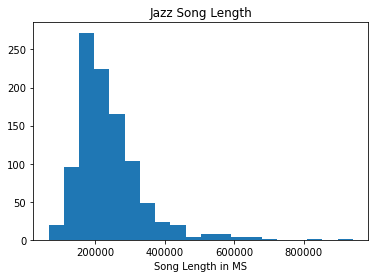

In [122]:
# Don't worry about the matplotlib syntax yet
fig, ax = plt.subplots()
ax.hist(track_durations, bins=20)
ax.set_title('Jazz Song Length')
ax.set_xlabel('Song Length in MS');

Describe the shape of this histogram in the markdown cell below. Is it skewed? Which way? Does the mean you calculated above seem correct? Does it indicate the presence of outliers of song length?

- your answer here
>


# Task 4

Now, let's write a function that takes in any list of track lengths, then prints and returns the mean, variance, and standard deviation of the list.

Feel free to use numpy or other methods to calculate the statistics.

As a bonus, we will make the function print out a histogram as well.

In [126]:
def track_length_descriptor(track_duration_list, genre=''):
    
    '''
    Params
    ______
    track_duration_list: a list of track lengths in milliseconds 
    returned from the spotify API
    
    genre: a string to add genre to the histogram title.
    
    Returns
    _______
    a list containing the mean, variance, and standard deviation of the tracks
    
    '''
    
    fig, ax = plt.subplots()
    ax.hist(<fill_in>, bins=20)
    ax.set_title(f'{genre} Song Length')
    ax.set_xlabel('Song Length in MS');
    plt.show()
    


In [1]:
#__SOLUTION__
def track_length_descriptor(track_duration_list, genre=''):
    
    '''
    Params
    ______
    track_duration_list: a list of track lengths in milliseconds 
    returned from the spotify API
    
    genre: a string to add genre to the histogram title.
    
    Returns
    _______
    a list containing the mean, variance, and standard deviation of the tracks
    
    '''
    
    fig, ax = plt.subplots()
    ax.hist(track_duration_list, bins=20)
    ax.set_title(f'{genre} Song Length')
    ax.set_xlabel('Song Length in MS');
    plt.show()
    
    print(f'''
    The mean track length of {genre} songs is {np.mean(track_duration_list)} ms.
    The variance of track lengths of {genre} songs is {np.var(track_duration_list)} ms.
    The standard deviation of track lengths of {genre} songs is {np.var(track_duration_list)} ms.
    
    
    ''')
    
    return [np.mean(track_duration_list), np.var(track_duration_list), np.std(track_duration_list)]

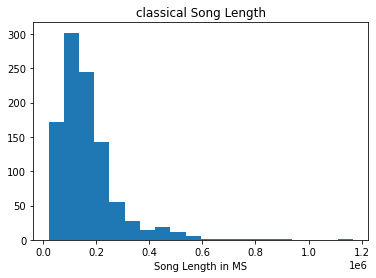


    The mean track length of classical songs is 165906.707 ms.
    The variance of track lengths of classical songs is 12858950170.405153 ms.
    The standard deviation of track lengths of classical songs is 12858950170.405153 ms.
    
    
    


In [162]:
track_mean, track_var, track_std = track_length_descriptor(classical_track_durations, 'classical')

In [84]:
track_durations[0]

int

In [76]:
jazz_track_lengths = [ja]

1000

In [63]:
params = {'q':'genre:jazz', 'type':'track', 'limit':50, 'offset':offset}

In [60]:
response = requests.get('https://api.spotify.com/v1/search/', params=params, headers=headers)

In [69]:
response.json()['tracks']['items'][0]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/05YVYeV4HxYp5rrWalvuE1'},
    'href': 'https://api.spotify.com/v1/artists/05YVYeV4HxYp5rrWalvuE1',
    'id': '05YVYeV4HxYp5rrWalvuE1',
    'name': 'Grover Washington, Jr.',
    'type': 'artist',
    'uri': 'spotify:artist:05YVYeV4HxYp5rrWalvuE1'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'KZ',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MD',
   'ME',
   'MK',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL'